In [112]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

# Load data
face_data = loadmat('face_emotion_data.mat')
x_train = face_data['X']
y_train = face_data['y']
x_eval = face_data['X']
y_eval = face_data['y']

In [113]:
print(face_data.keys())
print(face_data['X'].shape)


dict_keys(['__header__', '__version__', '__globals__', 'y', 'X'])
(128, 9)


# 1a)

In [114]:
# w = (X^T X)^(-1)X^T y
w_opt = np.linalg.inv(x_train.transpose()@x_train)@x_train.transpose()@y_train
y_hat = np.sign(x_eval@w_opt)
print('w_opt = ', w_opt)

w_opt =  [[ 0.94366942]
 [ 0.21373778]
 [ 0.26641775]
 [-0.39221373]
 [-0.00538552]
 [-0.01764687]
 [-0.16632809]
 [-0.0822838 ]
 [-0.16644364]]


# 1b) 

The weights can be used to classsify a new face image as happy or angry by taking the dot product of the weights and the image vector. If the dot product is positive, the image is classified as happy, and if the dot product is negative, the image is classified as angry.

# 1c)

The first three features are the most important features because they have the largest weights. 

In [115]:
print('least to most important features = ', np.argsort(w_opt.flatten())[-10:])

least to most important features =  [3 8 6 7 5 4 1 2 0]


# 1d)

We will use the first three features because they have the largest weights. The procedure will involve finding a solution to the least squares problem with the first three features of the training set. We will then use the weights to classify the test set.

In [116]:
# first 3 columns of X
x_train_3 = x_train[:,0:3]
x_eval_3 = x_eval[:,0:3]
# w = (X^T X)^(-1)X^T y
w_opt_3 = np.linalg.inv(x_train_3.transpose()@x_train_3)@x_train_3.transpose()@y_train
y_hat_3 = np.sign(x_eval_3@w_opt_3)
print('w_opt = ', w_opt_3)

w_opt =  [[ 0.72539587]
 [-0.54383441]
 [ 0.62829574]]


# 1e)

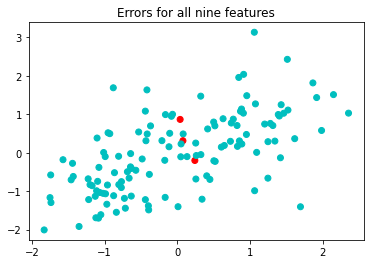

Error using all nine features: 2.34375%


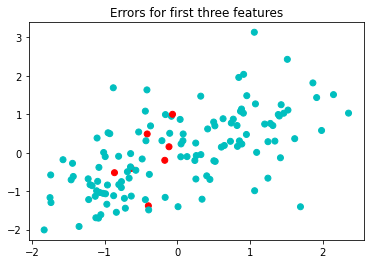

Error using first three features: 5.46875%


In [117]:
error_vec = [0 if i[0]==i[1] else 1 for i in np.hstack((y_hat, y_eval))]
plt.scatter(x_eval[:,0],x_eval[:,1], color=['c' if i==0 else 'r' for i in error_vec])
plt.title('Errors for all nine features')
plt.show()

print('Error using all nine features: '+ str(sum(error_vec)/128*100) + '%')

error_vec_3 = [0 if i[0]==i[1] else 1 for i in np.hstack((y_hat_3, y_eval))]
plt.scatter(x_eval_3[:,0],x_eval_3[:,1], color=['c' if i==0 else 'r' for i in error_vec_3])
plt.title('Errors for first three features')
plt.show()
print('Error using first three features: ' + str(sum(error_vec_3)/128*100) + '%')


# 1f)

In [118]:
# divide data in to 8 folds
x_train_folds = np.split(x_train, 8)
y_train_folds = np.split(y_train, 8)

# error vector
error_vec = np.zeros(8)

for i in range(8):
    # training
    x_train_7 = np.vstack(x_train_folds[0:i]+x_train_folds[i+1:])
    y_train_7 = np.vstack(y_train_folds[0:i]+y_train_folds[i+1:])
    # validation
    x_val = x_train_folds[i]
    y_val = y_train_folds[i]
    # w = (X^T X)^(-1)X^T y
    w_opt = np.linalg.inv(x_train_7.transpose()@x_train_7)@x_train_7.transpose()@y_train_7
    y_hat = np.sign(x_val@w_opt)
    error_vec[i] = sum([0 if i[0]==i[1] else 1 for i in np.hstack((y_hat, y_val))])/16*100

print('Error using all nine features and cross validation: '+ str(np.mean(error_vec)) + '%')

x_train_folds_3 = np.split(x_train_3, 8)
y_train_folds_3 = np.split(y_train, 8)

error_vec_3 = np.zeros(8)

for i in range(8):
    # training
    x_train_7_3 = np.vstack(x_train_folds_3[0:i]+x_train_folds_3[i+1:])
    y_train_7_3 = np.vstack(y_train_folds_3[0:i]+y_train_folds_3[i+1:])
    # validation
    x_val_3 = x_train_folds_3[i]
    y_val_3 = y_train_folds_3[i]
    # w = (X^T X)^(-1)X^T y
    w_opt_3 = np.linalg.inv(x_train_7_3.transpose()@x_train_7_3)@x_train_7_3.transpose()@y_train_7_3
    y_hat_3 = np.sign(x_val_3@w_opt_3)
    error_vec_3[i] = sum([0 if i[0]==i[1] else 1 for i in np.hstack((y_hat_3, y_val_3))])/16*100

print('Error using first three features and cross validation: '+ str(np.mean(error_vec_3)) + '%')


Error using all nine features and cross validation: 4.6875%
Error using first three features and cross validation: 7.03125%
